# Exercises for linear regression

In [144]:
## importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt


## Exercise 0

,X,y
0,74.037722,188.715484
1,27.822335,113.355848
2,0.610092,81.058774
3,149.622010,276.282661
4,26.255395,31.599341
...,...,...
395,144.350608,306.122943
396,73.500325,236.999614
397,63.512041,200.671423
398,176.247762,359.813350


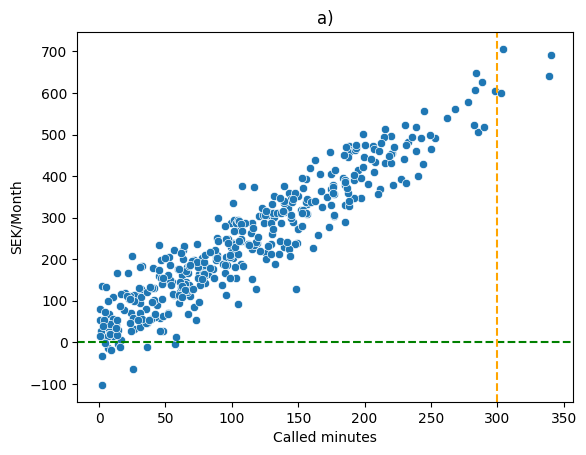

In [145]:
## a) 

seed =  42

# Generate simulated data
x = np.random.normal(100,100, 400)
x = np.absolute(x)
# Generate 
E = np.random.normal(0, 50, 400)

data = {"X" : x, "y": (x*2 + 25 + E)}
df  = pd.DataFrame(data)

display(df)
ax = sns.scatterplot(df, y="y", x="X")
ax.set(title="a)", ylabel="SEK/Month", xlabel="Called minutes")

ax = plt.axhline(0, color="green", linestyle= "dashed")
ax = plt.axvline(300, color="orange", linestyle= "dashed")

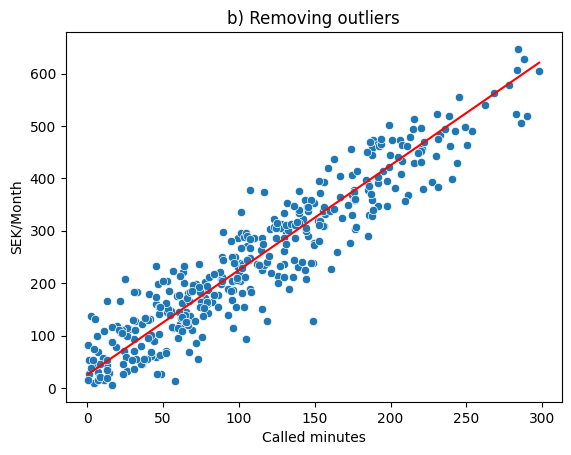

In [146]:
## b) 


## Dropping negative costs.
df.drop(df.loc[df["y"] < 0].index, inplace=True)

## Drop every call over 300 min
df.drop(df.loc[df["X"] > 300].index, inplace=True)

## Plot the new plot
ax = sns.scatterplot(df, x="X", y = "y")
ax.set(title="b) Removing outliers", ylabel="SEK/Month", xlabel="Called minutes")



## Calculate y_hat with given values for B1,B0
beta_0 = 25
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x
ax = sns.lineplot(df, x="X", y=y_hat(df["X"]), color="red")


In [147]:
## X = Minutes, Y = Cost in SEK/Month
df.head()
df["X"]

0       74.037722
1       27.822335
2        0.610092
3      149.622010
4       26.255395
          ...    
395    144.350608
396     73.500325
397     63.512041
398    176.247762
399     61.430757
Name: X, Length: 386, dtype: float64

##  1.  Train, test split


In [159]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction= 0.7, random_state=42, replace=False):
    
    X_train = X.sample(n=int(len(X)*train_fraction), random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)

    y_train = y.sample(n=int(len(y)*train_fraction), random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)


    return(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    

display(train_test_split(df["X"], df["y"]))




(270,) (116,) (270,) (116,)


None